In [1]:
import numpy as np
import h5py

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_file = './data_regression_cygnss/train_data.h5'
test_file = './data_regression_cygnss/test_data.h5'

In [4]:
x_train = h5py.File(train_file, 'r')['ddm_nbrcs'][:]
y_train = h5py.File(train_file, 'r')['windspeed'][:]

x_test = h5py.File(test_file, 'r')['ddm_nbrcs'][:]
y_test = h5py.File(test_file, 'r')['windspeed'][:]

## Linear regression with scikitlearn

Plot the relationship between the feature x and the target variable y. It looks like we will be able to fit these samples with an exponential function

f(x) = a\*exp(b\*x) + c
--> g(x) = log(f(x)) = a * log(x) + c

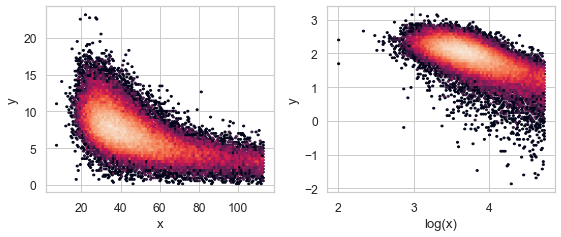

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[8, 3.5])
ax[0].hexbin(x_train, y_train, mincnt=1, bins='log')
ax[1].hexbin(np.log(x_train), np.log(y_train), mincnt=1, bins='log')

ax[0].set_xlabel('x')
ax[1].set_xlabel('log(x)')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')

fig.tight_layout()
plt.show()

In [6]:
regr = linear_model.LinearRegression()
regr.fit(np.log(x_train).reshape(-1,1), np.log(y_train))

print(regr.score(np.log(x_train).reshape(-1,1), np.log(y_train)))
print(regr.score(np.log(x_test).reshape(-1,1), np.log(y_test)))

0.4594816088005882
0.46321171260828264


RMSE = 1.94 m/s


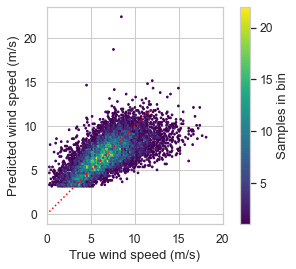

In [7]:
y_pred = regr.predict(np.log(x_test).reshape(-1,1))

print(f'RMSE = {np.sqrt(np.mean(((np.exp(y_pred) - y_test)**2))):.2f} m/s')

plt.hexbin(y_test, np.exp(y_pred), mincnt=1, cmap='viridis')
plt.colorbar(label='Samples in bin')
ax=plt.gca()
ax.set_aspect('equal')
ax.set_xlabel('True wind speed (m/s)')
ax.set_ylabel('Predicted wind speed (m/s)')
ax.plot(range(0, 13), range(0, 13), 'r:')
ax.set_xlim(0, 20)
plt.show()

## Fit of exponential model with scipy

In [8]:
from scipy.optimize import curve_fit

In [9]:
def f_exp(x, a, b, c):
    return a*np.exp(b*x) + c

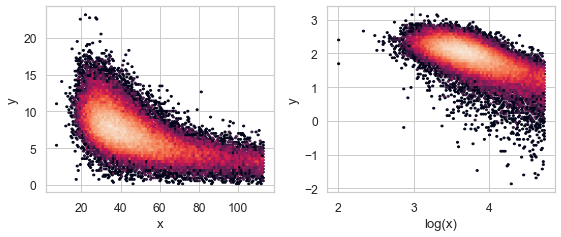

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[8, 3.5])
ax[0].hexbin(x_train, y_train, mincnt=1, bins='log')
ax[1].hexbin(np.log(x_train), np.log(y_train), mincnt=1, bins='log')

ax[0].set_xlabel('x')
ax[1].set_xlabel('log(x)')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')

fig.tight_layout()
plt.show()

In [11]:
p0, popt = curve_fit(f_exp, x_train, y_train, p0=[13, -0.05, 5])

RMSE = 1.93 m/s


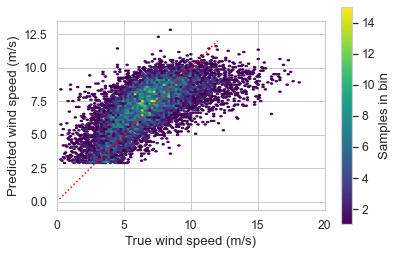

In [12]:
y_pred = f_exp(x_test, *p0)

print(f'RMSE = {np.sqrt(np.mean(((y_pred - y_test)**2))):.2f} m/s')

plt.hexbin(y_test, y_pred, mincnt=1, cmap='viridis')
plt.colorbar(label='Samples in bin')
ax=plt.gca()
ax.set_aspect('equal')
ax.set_xlabel('True wind speed (m/s)')
ax.set_ylabel('Predicted wind speed (m/s)')
ax.plot(range(0, 13), range(0, 13), 'r:')
ax.set_xlim(0, 20)
plt.show()